# Importación de Paquetes

In [1]:
import numpy as np
import pandas as pd


import matplotlib.pylab as plt 
import matplotlib.gridspec as gridspec
from scipy.signal import butter, lfilter


from sklearn import decomposition

!pip install mne
import mne as mne

     |████████████████████████████████| 6.9 MB 6.5 MB/s 


In [2]:
#Clono el repositorio de GitHub en Colab

!git clone https://github.com/mglucini/tpDMCyT
dirname = '/content/tpDMCyT/data/procesados/'


Cloning into 'tpDMCyT'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 46 (delta 7), reused 37 (delta 2), pack-reused 0
Unpacking objects: 100% (46/46), done.


# Cargo el Montaje 10-20 y los canales

In [3]:
# Montage 10-20 
mont1020 = mne.channels.make_standard_montage('standard_1020')
# Elijo canales que tengo
kept_channels = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 
                 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'FC1', 'FC2',
                 'FC5', 'FC6','CP1','CP2','CP5','CP6','AFz','Fpz','POz']

#Armar lista con las posiciones de los canales que poseo
ind = [i for (i, channel) in enumerate(mont1020.ch_names) if channel in kept_channels]
mont1020_30 = mont1020.copy()

# Me quedo solo con los 30 canales seleccionados de los 94 posibles
mont1020_30.ch_names = [mont1020.ch_names[x] for x in ind]
kept_channel_info = [mont1020.dig[x+3] for x in ind]

# Me quedo con las referencias desde dónde están ubicados los canales
mont1020_30.dig = mont1020.dig[0:3]+kept_channel_info
info_eeg = mne.create_info(ch_names=mont1020_30.ch_names, sfreq=128,
                            ch_types='eeg').set_montage(mont1020_30)




In [ ]:
info_eeg

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fpz, Fp2, AFz, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, T7, ...
 chs: 30 EEG
 custom_ref_applied: False
 dig: 33 items (3 Cardinal, 30 EEG)
 highpass: 0.0 Hz
 lowpass: 64.0 Hz
 meas_date: unspecified
 nchan: 30
 projs: []
 sfreq: 128.0 Hz
>

# Cargo datos de Sujetos

## Sujeto 8

### Cargo bl1

In [4]:
sujeto_8_1 = pd.read_csv(dirname+'suj_8_bl_1.txt', sep=',', header=None)

EEG_sujeto_8_1 = sujeto_8_1.to_numpy()
srate=128
ch    = EEG_sujeto_8_1.shape[0]
samples = EEG_sujeto_8_1.shape[1] 

print("Sampling rate: {:.2f} Hz".format(srate))
print("Data shape: {:d} samples x {:d} channels".format(EEG_sujeto_8_1.shape[1], EEG_sujeto_8_1.shape[0]))
print("Tiempo total : {:.2f} ".format(samples/srate))

Sampling rate: 128.00 Hz
Data shape: 7681 samples x 30 channels
Tiempo total : 60.01 


Visualizo la serie temporal con todos los canales

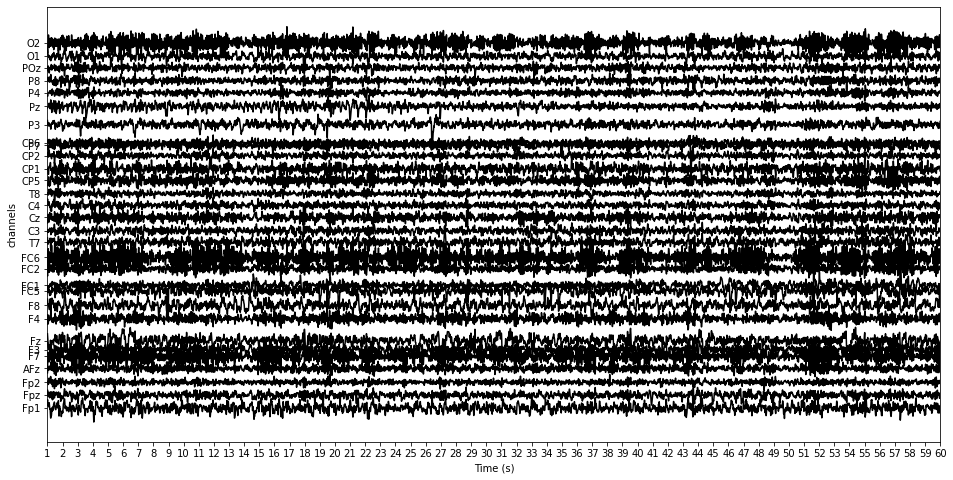

In [5]:
inicio = 1
fin    = 60
xticks = np.arange(inicio*srate,(fin+1)*srate,srate)
fig,ax = plt.subplots(ncols=1,figsize=(16,8))
#fig.suptitle('Series temporales (uV)')
yticks=[]
for c in np.arange(ch):
    temp = EEG_sujeto_8_1[c,inicio*srate:fin*srate]
    dmin=np.min(temp)
    dmax=np.max(temp)
    vmedio = np.mean([dmin,dmax])+30*c
    yticks.append(vmedio)
    ax.plot(np.arange(inicio*srate,fin*srate),vmedio*np.ones_like(temp)+temp,'k')
ax.set_xlim([inicio*srate,fin*srate])
ax.set_xticks(xticks)
ax.set_xticklabels(np.arange(inicio,fin+1))
ax.set_yticks(yticks)
ax.set_yticklabels(mont1020_30.ch_names)
ax.set_ylabel('channels')
ax.set_xlabel('Time (s)')
  
plt.show()

### Cargo bl2

In [6]:
sujeto_8_2 = pd.read_csv(dirname+'suj_8_bl_2.txt', sep=',', header=None)

EEG_sujeto_8_2 = sujeto_8_2.to_numpy()
srate=128
ch    = EEG_sujeto_8_2.shape[0]
samples = EEG_sujeto_8_2.shape[1] 

print("Sampling rate: {:.2f} Hz".format(srate))
print("Data shape: {:d} samples x {:d} channels".format(EEG_sujeto_8_2.shape[1], EEG_sujeto_8_2.shape[0]))
print("Tiempo total : {:.2f} ".format(samples/srate))

Sampling rate: 128.00 Hz
Data shape: 7681 samples x 30 channels
Tiempo total : 60.01 


Visualizo la serie temporal con todos los canales

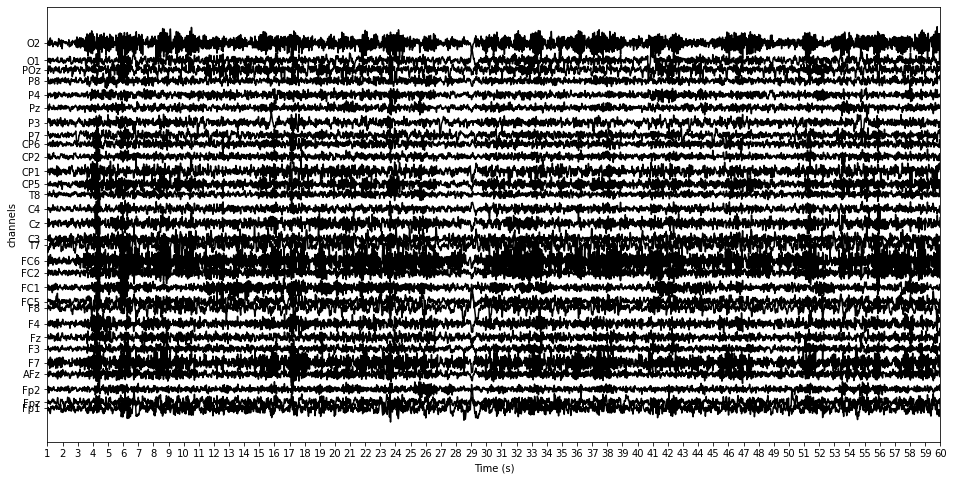

In [7]:
inicio = 1
fin    = 60
xticks = np.arange(inicio*srate,(fin+1)*srate,srate)
fig,ax = plt.subplots(ncols=1,figsize=(16,8))
#fig.suptitle('Series temporales (uV)')
yticks=[]
for c in np.arange(ch):
    temp = EEG_sujeto_8_2[c,inicio*srate:fin*srate]
    dmin=np.min(temp)
    dmax=np.max(temp)
    vmedio = np.mean([dmin,dmax])+30*c
    yticks.append(vmedio)
    ax.plot(np.arange(inicio*srate,fin*srate),vmedio*np.ones_like(temp)+temp,'k')
ax.set_xlim([inicio*srate,fin*srate])
ax.set_xticks(xticks)
ax.set_xticklabels(np.arange(inicio,fin+1))
ax.set_yticks(yticks)
ax.set_yticklabels(mont1020_30.ch_names)
ax.set_ylabel('channels')
ax.set_xlabel('Time (s)')
  
plt.show()

## Sujeto 9

### Cargo bl1

In [8]:
sujeto_9_1 = pd.read_csv(dirname+'suj_9_bl_1.txt', sep=',', header=None)

EEG_sujeto_9_1 = sujeto_9_1.to_numpy()
srate=128
ch    = EEG_sujeto_9_1.shape[0]
samples = EEG_sujeto_9_1.shape[1] 

print("Sampling rate: {:.2f} Hz".format(srate))
print("Data shape: {:d} samples x {:d} channels".format(EEG_sujeto_9_1.shape[1], EEG_sujeto_9_1.shape[0]))
print("Tiempo total : {:.2f} ".format(samples/srate))

Sampling rate: 128.00 Hz
Data shape: 7681 samples x 30 channels
Tiempo total : 60.01 


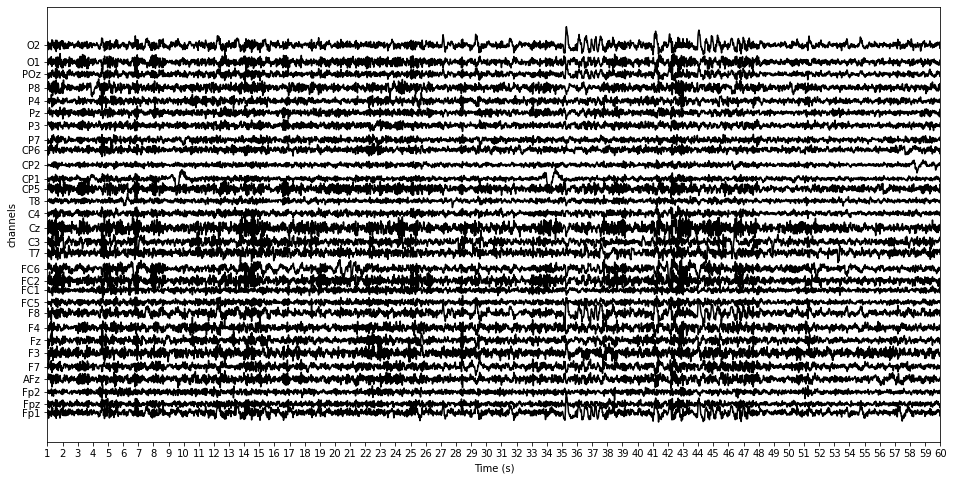

In [9]:
inicio = 1
fin    = 60
xticks = np.arange(inicio*srate,(fin+1)*srate,srate)
fig,ax = plt.subplots(ncols=1,figsize=(16,8))
#fig.suptitle('Series temporales (uV)')
yticks=[]
for c in np.arange(ch):
    temp = EEG_sujeto_9_1[c,inicio*srate:fin*srate]
    dmin=np.min(temp)
    dmax=np.max(temp)
    vmedio = np.mean([dmin,dmax])+30*c
    yticks.append(vmedio)
    ax.plot(np.arange(inicio*srate,fin*srate),vmedio*np.ones_like(temp)+temp,'k')
ax.set_xlim([inicio*srate,fin*srate])
ax.set_xticks(xticks)
ax.set_xticklabels(np.arange(inicio,fin+1))
ax.set_yticks(yticks)
ax.set_yticklabels(mont1020_30.ch_names)
ax.set_ylabel('channels')
ax.set_xlabel('Time (s)')
  
plt.show()

### Cargo bl2

In [10]:
sujeto_9_2 = pd.read_csv(dirname+'suj_9_bl_2.txt', sep=',', header=None)

EEG_sujeto_9_2 = sujeto_9_2.to_numpy()
srate=128
ch    = EEG_sujeto_9_2.shape[0]
samples = EEG_sujeto_9_2.shape[1] 

print("Sampling rate: {:.2f} Hz".format(srate))
print("Data shape: {:d} samples x {:d} channels".format(EEG_sujeto_9_2.shape[1], EEG_sujeto_9_2.shape[0]))
print("Tiempo total : {:.2f} ".format(samples/srate))

Sampling rate: 128.00 Hz
Data shape: 7681 samples x 30 channels
Tiempo total : 60.01 


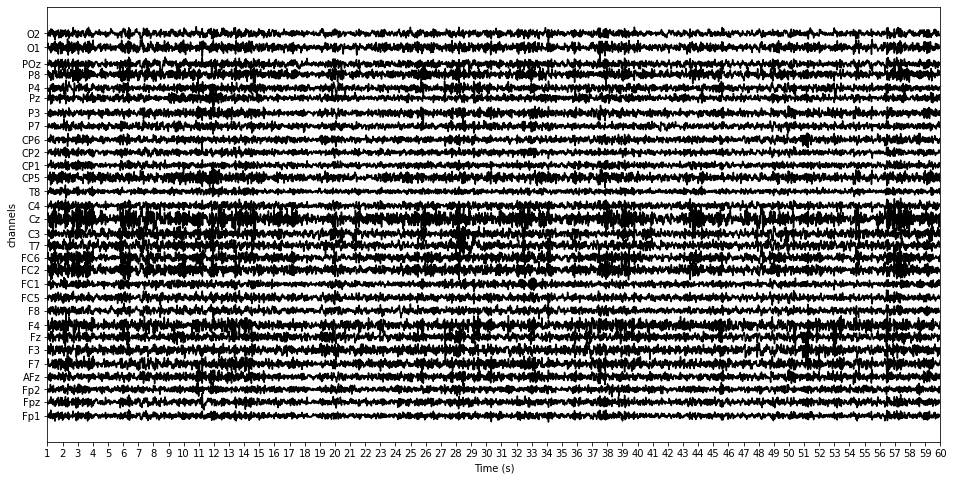

In [11]:
inicio = 1
fin    = 60
xticks = np.arange(inicio*srate,(fin+1)*srate,srate)
fig,ax = plt.subplots(ncols=1,figsize=(16,8))
#fig.suptitle('Series temporales (uV)')
yticks=[]
for c in np.arange(ch):
    temp = EEG_sujeto_9_2[c,inicio*srate:fin*srate]
    dmin=np.min(temp)
    dmax=np.max(temp)
    vmedio = np.mean([dmin,dmax])+30*c
    yticks.append(vmedio)
    ax.plot(np.arange(inicio*srate,fin*srate),vmedio*np.ones_like(temp)+temp,'k')
ax.set_xlim([inicio*srate,fin*srate])
ax.set_xticks(xticks)
ax.set_xticklabels(np.arange(inicio,fin+1))
ax.set_yticks(yticks)
ax.set_yticklabels(mont1020_30.ch_names)
ax.set_ylabel('channels')
ax.set_xlabel('Time (s)')
  
plt.show()

## Sujeto 10

### Cargo bl1

In [12]:
sujeto_10_1 = pd.read_csv(dirname+'suj_10_bl_1.txt', sep=',', header=None)

EEG_sujeto_10_1 = sujeto_10_1.to_numpy()
srate=128
ch    = EEG_sujeto_10_1.shape[0]
samples = EEG_sujeto_10_1.shape[1] 

print("Sampling rate: {:.2f} Hz".format(srate))
print("Data shape: {:d} samples x {:d} channels".format(EEG_sujeto_10_1.shape[1], EEG_sujeto_10_1.shape[0]))
print("Tiempo total : {:.2f} ".format(samples/srate))

Sampling rate: 128.00 Hz
Data shape: 7681 samples x 30 channels
Tiempo total : 60.01 


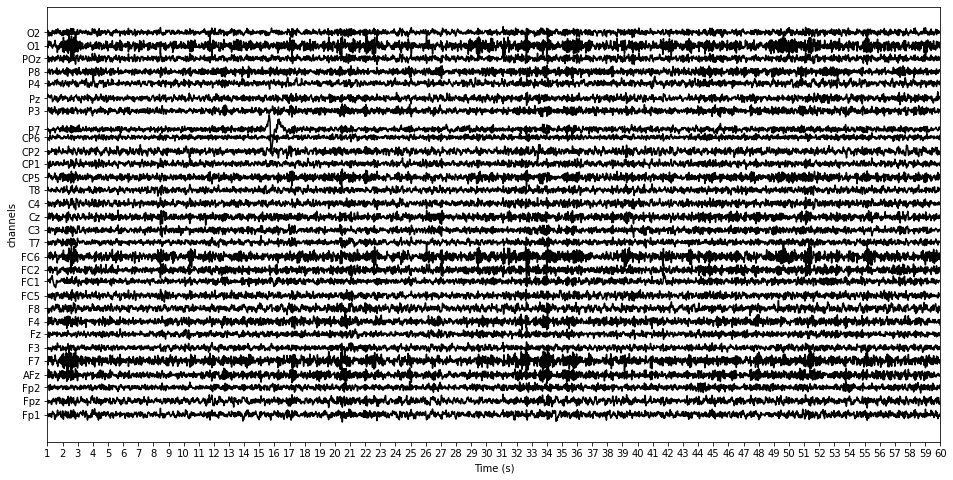

In [13]:
inicio = 1
fin    = 60
xticks = np.arange(inicio*srate,(fin+1)*srate,srate)
fig,ax = plt.subplots(ncols=1,figsize=(16,8))
#fig.suptitle('Series temporales (uV)')
yticks=[]
for c in np.arange(ch):
    temp = EEG_sujeto_10_1[c,inicio*srate:fin*srate]
    dmin=np.min(temp)
    dmax=np.max(temp)
    vmedio = np.mean([dmin,dmax])+30*c
    yticks.append(vmedio)
    ax.plot(np.arange(inicio*srate,fin*srate),vmedio*np.ones_like(temp)+temp,'k')
ax.set_xlim([inicio*srate,fin*srate])
ax.set_xticks(xticks)
ax.set_xticklabels(np.arange(inicio,fin+1))
ax.set_yticks(yticks)
ax.set_yticklabels(mont1020_30.ch_names)
ax.set_ylabel('channels')
ax.set_xlabel('Time (s)')
  
plt.show()

### Cargo bl2

In [14]:
sujeto_10_2 = pd.read_csv(dirname+'suj_10_bl_2.txt', sep=',', header=None)

EEG_sujeto_10_2 = sujeto_10_2.to_numpy()
srate=128
ch    = EEG_sujeto_10_2.shape[0]
samples = EEG_sujeto_10_2.shape[1] 

print("Sampling rate: {:.2f} Hz".format(srate))
print("Data shape: {:d} samples x {:d} channels".format(EEG_sujeto_10_2.shape[1], EEG_sujeto_10_2.shape[0]))
print("Tiempo total : {:.2f} ".format(samples/srate))

Sampling rate: 128.00 Hz
Data shape: 7681 samples x 30 channels
Tiempo total : 60.01 


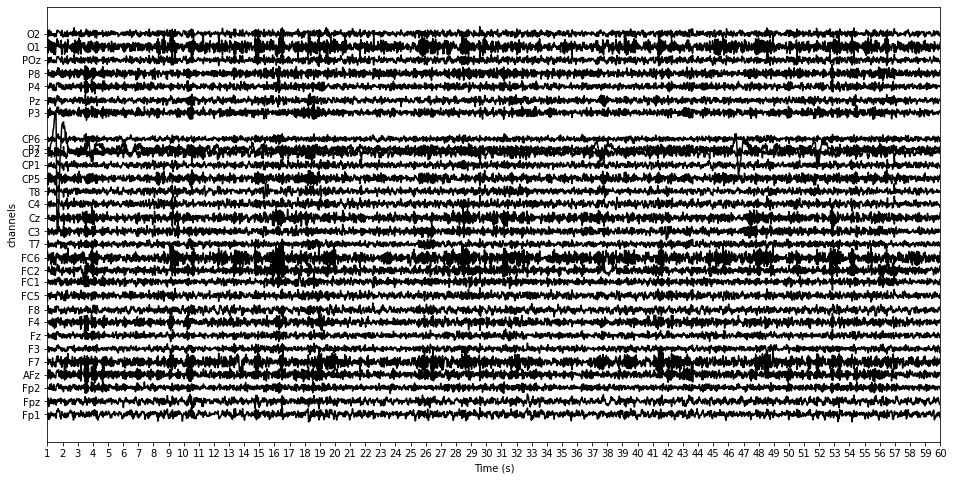

In [15]:
inicio = 1
fin    = 60
xticks = np.arange(inicio*srate,(fin+1)*srate,srate)
fig,ax = plt.subplots(ncols=1,figsize=(16,8))
#fig.suptitle('Series temporales (uV)')
yticks=[]
for c in np.arange(ch):
    temp = EEG_sujeto_10_2[c,inicio*srate:fin*srate]
    dmin=np.min(temp)
    dmax=np.max(temp)
    vmedio = np.mean([dmin,dmax])+30*c
    yticks.append(vmedio)
    ax.plot(np.arange(inicio*srate,fin*srate),vmedio*np.ones_like(temp)+temp,'k')
ax.set_xlim([inicio*srate,fin*srate])
ax.set_xticks(xticks)
ax.set_xticklabels(np.arange(inicio,fin+1))
ax.set_yticks(yticks)
ax.set_yticklabels(mont1020_30.ch_names)
ax.set_ylabel('channels')
ax.set_xlabel('Time (s)')
  
plt.show()

## Sujeto 12

### Cargo bl1

In [16]:
sujeto_12_1 = pd.read_csv(dirname+'suj_12_bl_1.txt', sep=',', header=None)

EEG_sujeto_12_1 = sujeto_12_1.to_numpy()
srate=128
ch    = EEG_sujeto_12_1.shape[0]
samples = EEG_sujeto_12_1.shape[1] 

print("Sampling rate: {:.2f} Hz".format(srate))
print("Data shape: {:d} samples x {:d} channels".format(EEG_sujeto_12_1.shape[1], EEG_sujeto_12_1.shape[0]))
print("Tiempo total : {:.2f} ".format(samples/srate))

Sampling rate: 128.00 Hz
Data shape: 7681 samples x 30 channels
Tiempo total : 60.01 


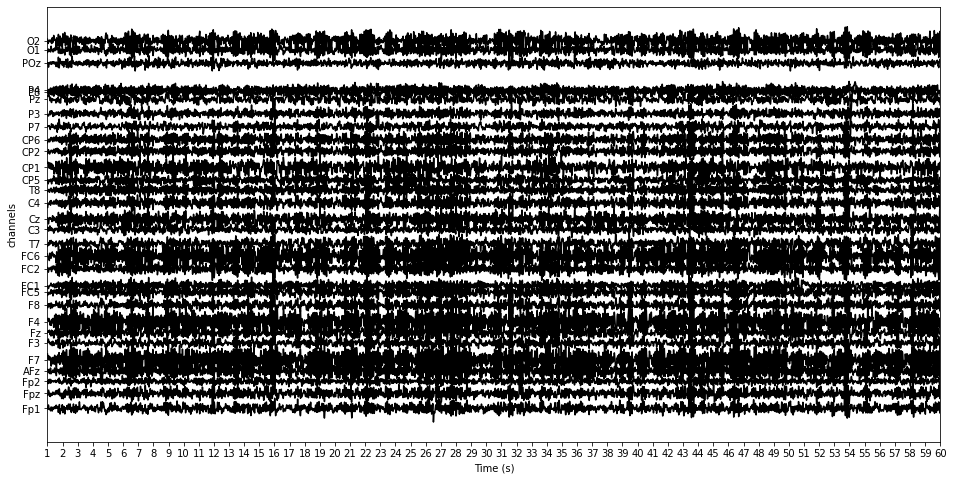

In [17]:
inicio = 1
fin    = 60
xticks = np.arange(inicio*srate,(fin+1)*srate,srate)
fig,ax = plt.subplots(ncols=1,figsize=(16,8))
#fig.suptitle('Series temporales (uV)')
yticks=[]
for c in np.arange(ch):
    temp = EEG_sujeto_12_1[c,inicio*srate:fin*srate]
    dmin=np.min(temp)
    dmax=np.max(temp)
    vmedio = np.mean([dmin,dmax])+30*c
    yticks.append(vmedio)
    ax.plot(np.arange(inicio*srate,fin*srate),vmedio*np.ones_like(temp)+temp,'k')
ax.set_xlim([inicio*srate,fin*srate])
ax.set_xticks(xticks)
ax.set_xticklabels(np.arange(inicio,fin+1))
ax.set_yticks(yticks)
ax.set_yticklabels(mont1020_30.ch_names)
ax.set_ylabel('channels')
ax.set_xlabel('Time (s)')
  
plt.show()

### Cargo bl2

In [18]:
sujeto_12_2 = pd.read_csv(dirname+'suj_12_bl_2.txt', sep=',', header=None)

EEG_sujeto_12_2 = sujeto_12_2.to_numpy()
srate=128
ch    = EEG_sujeto_12_2.shape[0]
samples = EEG_sujeto_12_2.shape[1] 

print("Sampling rate: {:.2f} Hz".format(srate))
print("Data shape: {:d} samples x {:d} channels".format(EEG_sujeto_12_2.shape[1], EEG_sujeto_12_2.shape[0]))
print("Tiempo total : {:.2f} ".format(samples/srate))

Sampling rate: 128.00 Hz
Data shape: 7681 samples x 30 channels
Tiempo total : 60.01 


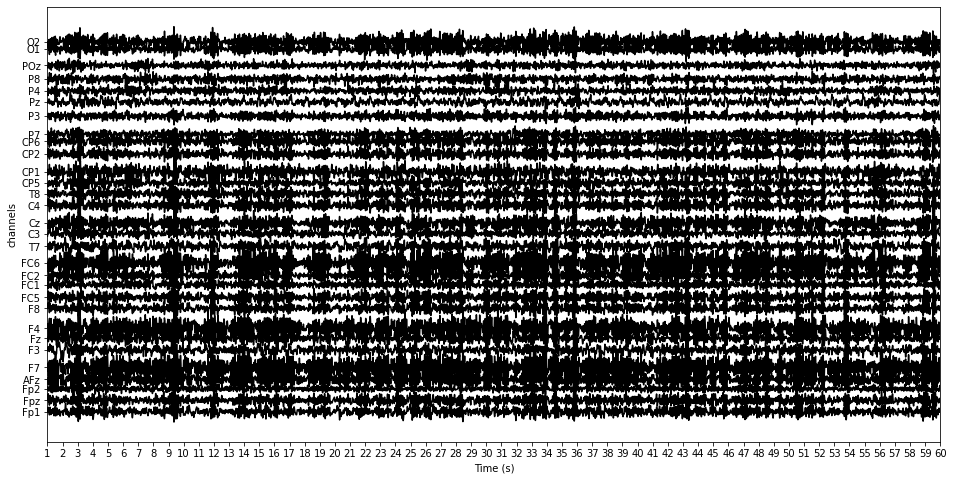

In [19]:
inicio = 1
fin    = 60
xticks = np.arange(inicio*srate,(fin+1)*srate,srate)
fig,ax = plt.subplots(ncols=1,figsize=(16,8))
#fig.suptitle('Series temporales (uV)')
yticks=[]
for c in np.arange(ch):
    temp = EEG_sujeto_12_2[c,inicio*srate:fin*srate]
    dmin=np.min(temp)
    dmax=np.max(temp)
    vmedio = np.mean([dmin,dmax])+30*c
    yticks.append(vmedio)
    ax.plot(np.arange(inicio*srate,fin*srate),vmedio*np.ones_like(temp)+temp,'k')
ax.set_xlim([inicio*srate,fin*srate])
ax.set_xticks(xticks)
ax.set_xticklabels(np.arange(inicio,fin+1))
ax.set_yticks(yticks)
ax.set_yticklabels(mont1020_30.ch_names)
ax.set_ylabel('channels')
ax.set_xlabel('Time (s)')
  
plt.show()

## Sujeto 13

### Cargo bl1

In [20]:
sujeto_13_1 = pd.read_csv(dirname+'suj_13_bl_1.txt', sep=',', header=None)

EEG_sujeto_13_1 = sujeto_13_1.to_numpy()
srate=128
ch    = EEG_sujeto_13_1.shape[0]
samples = EEG_sujeto_13_1.shape[1] 

print("Sampling rate: {:.2f} Hz".format(srate))
print("Data shape: {:d} samples x {:d} channels".format(EEG_sujeto_13_1.shape[1], EEG_sujeto_13_1.shape[0]))
print("Tiempo total : {:.2f} ".format(samples/srate))

Sampling rate: 128.00 Hz
Data shape: 7681 samples x 30 channels
Tiempo total : 60.01 


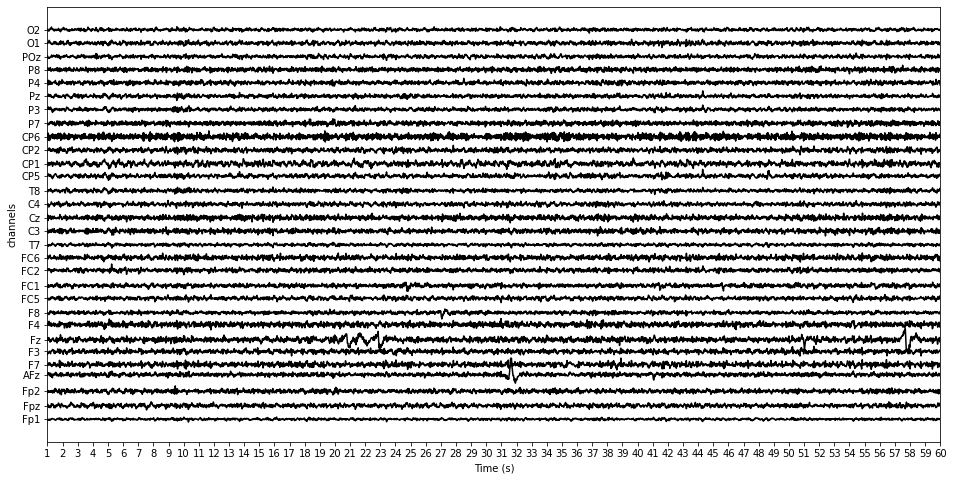

In [21]:
inicio = 1
fin    = 60
xticks = np.arange(inicio*srate,(fin+1)*srate,srate)
fig,ax = plt.subplots(ncols=1,figsize=(16,8))
#fig.suptitle('Series temporales (uV)')
yticks=[]
for c in np.arange(ch):
    temp = EEG_sujeto_13_1[c,inicio*srate:fin*srate]
    dmin=np.min(temp)
    dmax=np.max(temp)
    vmedio = np.mean([dmin,dmax])+30*c
    yticks.append(vmedio)
    ax.plot(np.arange(inicio*srate,fin*srate),vmedio*np.ones_like(temp)+temp,'k')
ax.set_xlim([inicio*srate,fin*srate])
ax.set_xticks(xticks)
ax.set_xticklabels(np.arange(inicio,fin+1))
ax.set_yticks(yticks)
ax.set_yticklabels(mont1020_30.ch_names)
ax.set_ylabel('channels')
ax.set_xlabel('Time (s)')
  
plt.show()

### Cargo bl2

In [22]:
sujeto_13_2 = pd.read_csv(dirname+'suj_13_bl_2.txt', sep=',', header=None)

EEG_sujeto_13_2 = sujeto_13_2.to_numpy()
srate=128
ch    = EEG_sujeto_13_2.shape[0]
samples = EEG_sujeto_13_2.shape[1] 

print("Sampling rate: {:.2f} Hz".format(srate))
print("Data shape: {:d} samples x {:d} channels".format(EEG_sujeto_13_2.shape[1], EEG_sujeto_13_2.shape[0]))
print("Tiempo total : {:.2f} ".format(samples/srate))

Sampling rate: 128.00 Hz
Data shape: 7681 samples x 30 channels
Tiempo total : 60.01 


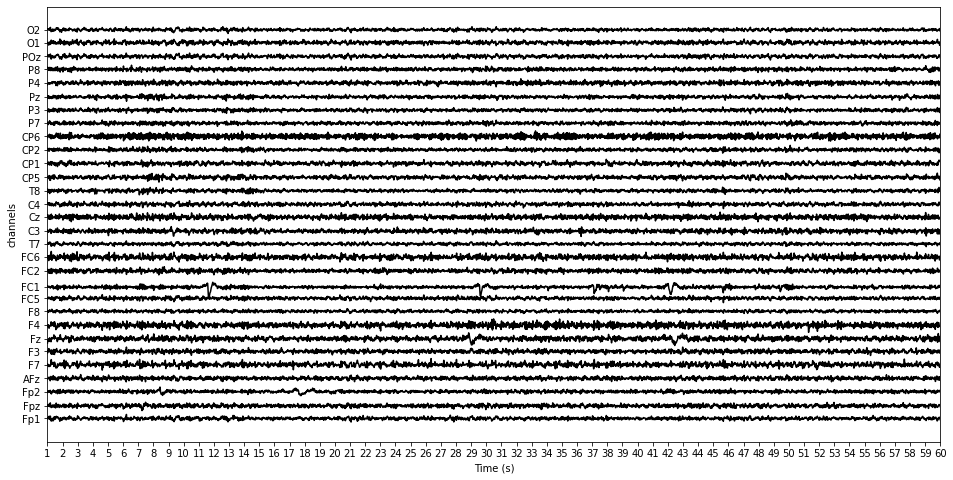

In [23]:
inicio = 1
fin    = 60
xticks = np.arange(inicio*srate,(fin+1)*srate,srate)
fig,ax = plt.subplots(ncols=1,figsize=(16,8))
#fig.suptitle('Series temporales (uV)')
yticks=[]
for c in np.arange(ch):
    temp = EEG_sujeto_13_2[c,inicio*srate:fin*srate]
    dmin=np.min(temp)
    dmax=np.max(temp)
    vmedio = np.mean([dmin,dmax])+30*c
    yticks.append(vmedio)
    ax.plot(np.arange(inicio*srate,fin*srate),vmedio*np.ones_like(temp)+temp,'k')
ax.set_xlim([inicio*srate,fin*srate])
ax.set_xticks(xticks)
ax.set_xticklabels(np.arange(inicio,fin+1))
ax.set_yticks(yticks)
ax.set_yticklabels(mont1020_30.ch_names)
ax.set_ylabel('channels')
ax.set_xlabel('Time (s)')
  
plt.show()

# Graficar los promedios de la topografía para cada participante. ¿Hay diferencias entre los dos períodos de reposo?

In [46]:
#Creo una dataframe con los canales y los promedios de cada canal para cada sujeto en el período 1 (mean1) y en el 2 (mean2)

promedios=pd.DataFrame()
promedios['ch_names'] = mont1020_30.ch_names
promedios['sujeto8_mean1'] = sujeto_8_1.iloc[:, 1:].mean(axis=1)
promedios['sujeto8_mean2'] = sujeto_8_2.iloc[:, 1:].mean(axis=1)
promedios['sujeto9_mean1'] = sujeto_9_1.iloc[:, 1:].mean(axis=1)
promedios['sujeto9_mean2'] = sujeto_9_2.iloc[:, 1:].mean(axis=1)
promedios['sujeto10_mean1'] = sujeto_10_1.iloc[:, 1:].mean(axis=1)
promedios['sujeto10_mean2'] = sujeto_10_2.iloc[:, 1:].mean(axis=1)
promedios['sujeto12_mean1'] = sujeto_12_1.iloc[:, 1:].mean(axis=1)
promedios['sujeto12_mean2'] = sujeto_12_2.iloc[:, 1:].mean(axis=1)
promedios['sujeto13_mean1'] = sujeto_13_1.iloc[:, 1:].mean(axis=1)
promedios['sujeto13_mean2'] = sujeto_13_2.iloc[:, 1:].mean(axis=1)

,ch_names,sujeto8_mean1,sujeto8_mean2,sujeto9_mean1,sujeto9_mean2,sujeto10_mean1,sujeto10_mean2,sujeto12_mean1,sujeto12_mean2,sujeto13_mean1,sujeto13_mean2
0,Fp1,0.002241,-0.017957,-0.008427,-0.004007,-0.001031,-0.005398,0.018893,0.000453,-0.000362,-0.003404
1,Fpz,0.004266,-0.001299,-0.001963,-0.003685,-0.006499,0.000449,0.009239,0.003678,0.005256,0.001411
2,Fp2,-0.002373,0.007714,0.002196,-0.004371,-0.003139,-0.002779,-0.000100,-0.000872,-0.000971,0.003042
3,AFz,0.003417,0.005199,0.004728,0.005703,0.000687,-0.000404,-0.010257,-0.000362,-0.001237,0.002970
4,F7,0.003673,0.003951,0.002530,0.007554,0.003616,0.000095,-0.012420,-0.003738,-0.003174,0.000568
5,F3,0.001616,-0.001504,-0.002422,-0.011417,0.001298,-0.001229,0.002815,0.007974,0.000659,-0.004928
6,Fz,0.003190,0.015742,0.001521,-0.004741,-0.001016,-0.000379,-0.018724,0.000344,-0.004372,0.016550
7,F4,-0.002065,0.015707,0.002090,0.005722,0.001033,0.000766,-0.030686,-0.003598,-0.003374,0.000474
8,F8,0.011300,-0.014913,0.001526,-0.008858,-0.003733,0.002882,0.018651,-0.001224,0.002213,-0.003384
9,FC5,-0.004981,-0.007500,0.000247,0.000217,-0.001007,0.000775,0.014857,-0.007454,0.001794,-0.004442


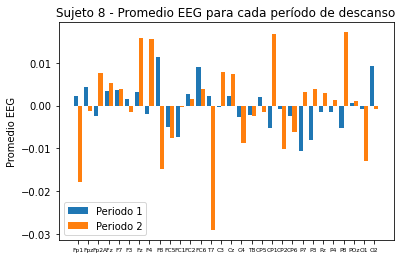

In [40]:
# Grafico promedios

fig, ax = plt.subplots()
channels= mont1020_30.ch_names
periodo1= promedios['sujeto8_mean1'].to_list()
periodo2= promedios['sujeto8_mean2'].to_list()
x = np.arange(len(channels))
width = 0.40
rects1 = ax.bar(x - width/2, periodo1, width, label='Periodo 1')
rects2 = ax.bar(x + width/2, periodo2, width, label='Periodo 2')
ax.set_ylabel('Promedio EEG')
ax.set_title('Sujeto 8 - Promedio EEG para cada período de descanso')
ax.set_xticks(x)
ax.set_xticklabels(channels)
ax.xaxis.set_tick_params(labelsize=6)
ax.legend()
plt.show()


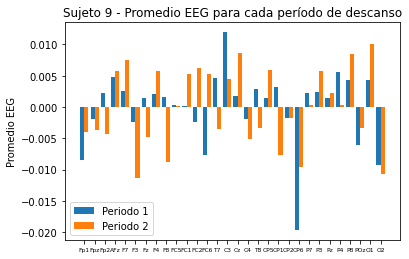

In [41]:
fig, ax = plt.subplots()
channels= mont1020_30.ch_names
periodo1= promedios['sujeto9_mean1'].to_list()
periodo2= promedios['sujeto9_mean2'].to_list()
x = np.arange(len(channels))
width = 0.40
rects1 = ax.bar(x - width/2, periodo1, width, label='Periodo 1')
rects2 = ax.bar(x + width/2, periodo2, width, label='Periodo 2')
ax.set_ylabel('Promedio EEG')
ax.set_title('Sujeto 9 - Promedio EEG para cada período de descanso')
ax.set_xticks(x)
ax.set_xticklabels(channels)
ax.xaxis.set_tick_params(labelsize=6)
ax.legend()
plt.show()


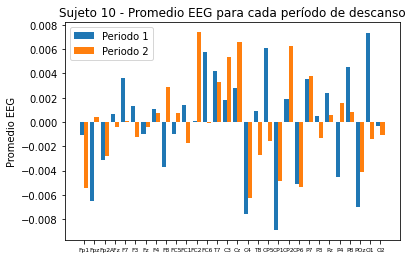

In [42]:
fig, ax = plt.subplots()
channels= mont1020_30.ch_names
periodo1= promedios['sujeto10_mean1'].to_list()
periodo2= promedios['sujeto10_mean2'].to_list()
x = np.arange(len(channels))
width = 0.40
rects1 = ax.bar(x - width/2, periodo1, width, label='Periodo 1')
rects2 = ax.bar(x + width/2, periodo2, width, label='Periodo 2')
ax.set_ylabel('Promedio EEG')
ax.set_title('Sujeto 10 - Promedio EEG para cada período de descanso')
ax.set_xticks(x)
ax.set_xticklabels(channels)
ax.xaxis.set_tick_params(labelsize=6)
ax.legend()
plt.show()

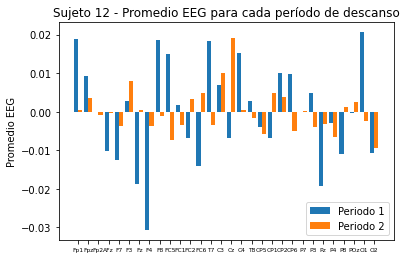

In [43]:
fig, ax = plt.subplots()
channels= mont1020_30.ch_names
periodo1= promedios['sujeto12_mean1'].to_list()
periodo2= promedios['sujeto12_mean2'].to_list()
x = np.arange(len(channels))
width = 0.40
rects1 = ax.bar(x - width/2, periodo1, width, label='Periodo 1')
rects2 = ax.bar(x + width/2, periodo2, width, label='Periodo 2')
ax.set_ylabel('Promedio EEG')
ax.set_title('Sujeto 12 - Promedio EEG para cada período de descanso')
ax.set_xticks(x)
ax.set_xticklabels(channels)
ax.xaxis.set_tick_params(labelsize=6)
ax.legend()
plt.show()

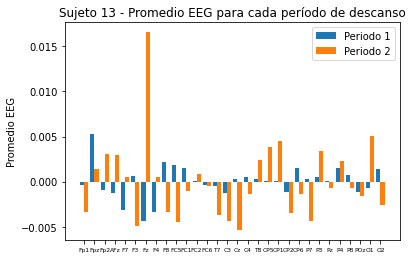

In [47]:
fig, ax = plt.subplots()
channels= mont1020_30.ch_names
periodo1= promedios['sujeto13_mean1'].to_list()
periodo2= promedios['sujeto13_mean2'].to_list()
x = np.arange(len(channels))
width = 0.40
rects1 = ax.bar(x - width/2, periodo1, width, label='Periodo 1')
rects2 = ax.bar(x + width/2, periodo2, width, label='Periodo 2')
ax.set_ylabel('Promedio EEG')
ax.set_title('Sujeto 13 - Promedio EEG para cada período de descanso')
ax.set_xticks(x)
ax.set_xticklabels(channels)
ax.xaxis.set_tick_params(labelsize=6)
ax.legend()
plt.show()


## Otras consgnas pendientes

### Calcular las componentes principales para el total de los datos (concatenados en el tiempo). ¿Qué peso tiene cada proyección en los distintos períodos de reposo?

### Referenciar los datos al promedio por sample. 

### Calcular el Campo de Potencia Global (GFP). Encontrar los picos del GFP. Guardar los vectores del GFP para los máximos encontrados.